### Background of Dataset: "This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are femalesat least 21 years old of Pima Indian heritage."

#### link to dataset: https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Checking for missing data

<AxesSubplot: >

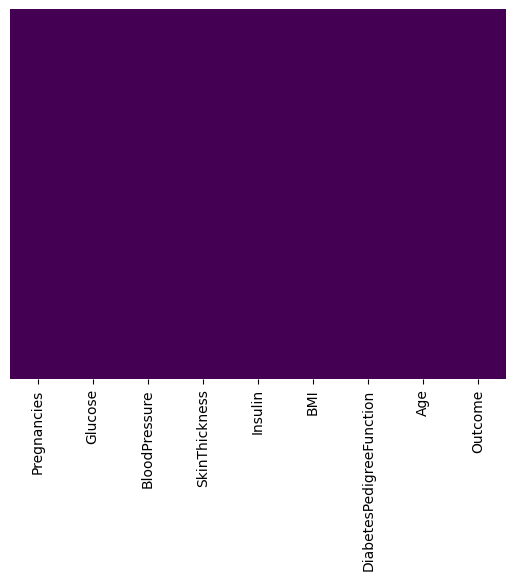

In [5]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### No missing data was found. We can proceed to the next step.

#### Standardizing the data to ensure no immense datapoint skews the model's prediction.

In [8]:
scaler = StandardScaler()
scaler.fit(data.drop('Outcome',axis=1))

StandardScaler()

In [10]:
sc_features = scaler.transform(data.drop('Outcome',axis=1))
data_features = pd.DataFrame(sc_features,columns=data.columns[:-1])

In [11]:
data_features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### Training the model.

In [13]:
X = data_features
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#### Using elbow method to determine the best number of k neighbors.

In [14]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

Text(0, 0.5, 'Error Rate')

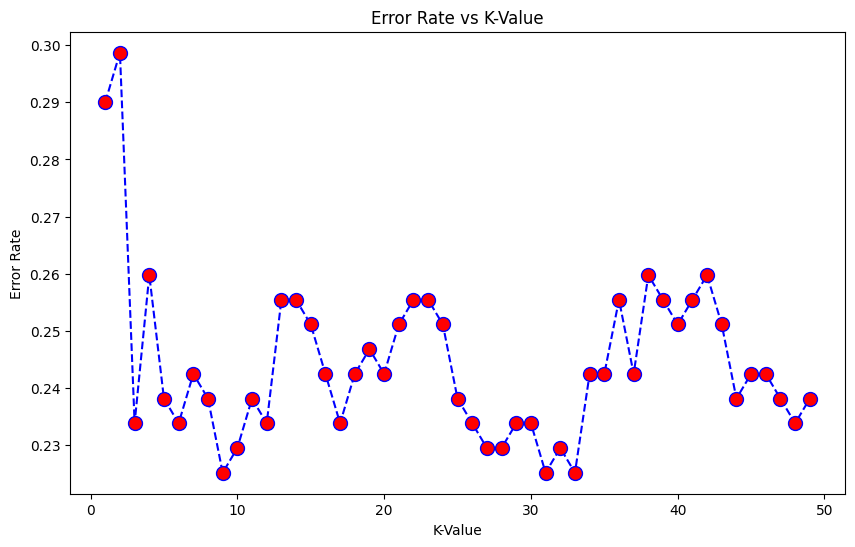

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')

#### Based on the graph, the error rate fluctuates as the K-value increases. Thus, the K-value that will be used, will be 9.

#### Model 1

In [16]:
knn = KNeighborsClassifier(n_neighbors=9)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [18]:
prediction = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       150
           1       0.72      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



#### Since a one would indicate that the female has diabetes, a one would then be positive, thus, the format for the confusion matrix will be as below.

#### [[TN, FP]
 [FN,TP]]

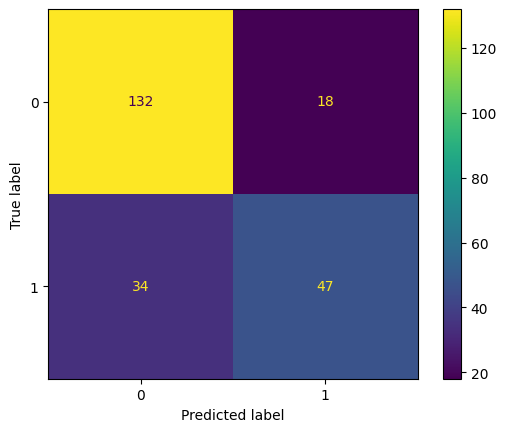

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction)
plt.show()

In [48]:
#Calculating the True Negative Rate
tnr = (confusion_matrix(y_test,prediction)[0,0]/(confusion_matrix(y_test,prediction)[0,0] + 
                                                confusion_matrix(y_test,prediction)[0,1]) * 100).round()
#Calculating the False Positive Rate
fpr = (confusion_matrix(y_test,prediction)[0,1]/(confusion_matrix(y_test,prediction)[0,1] + 
                                                confusion_matrix(y_test,prediction)[0,0]) * 100).round()
#Caculating the False Negative Rate
fnr = (confusion_matrix(y_test,prediction)[1,0]/(confusion_matrix(y_test,prediction)[1,0] + 
                                                confusion_matrix(y_test,prediction)[1,1]) * 100).round()

In [49]:
print(f'True Negative Rate: {tnr}\nFalse Positive Rate: {fpr}\nFalse Negative Rate: {fnr}')

True Negative Rate: 88.0
False Positive Rate: 12.0
False Negative Rate: 42.0


#### The model did decently well with an accuracy of 77%. However, the recall is low, with it being at 58%. The True Negative Rate is 88%, thus, the model is better at predicting negative cases, 0, then it is at predicting positive cases, a 1. Furthermore, the False Positive Rate is at 12% and the False Negative Rate is at 42%. The False Negative Rate is too high within the medical context. It would be preferred if the values for the False Negative Rate and False Positive Rate were switched, since it will be better to misdiagnose someone who does not have diabetes with diabetes over misdiagnosing someone who has diabetes and telling them that they do not have diabetes. Next, we will train the model again, however, this time increasing the amount of data available for it to train with from 70% training data to 80% training data. 

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Model 2

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
knn2 = KNeighborsClassifier(n_neighbors=9)

In [58]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [59]:
prediction2 = knn2.predict(X_test)

In [61]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.73      0.59      0.65        51

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



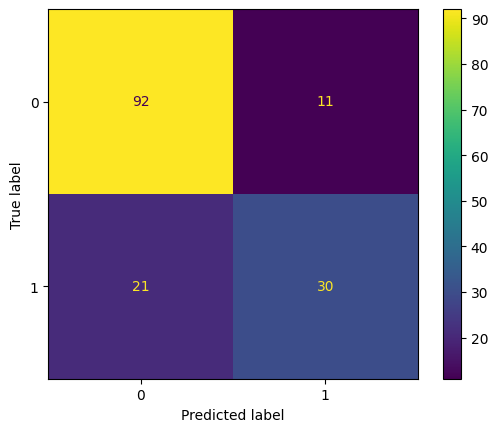

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction2)
plt.show()

In [66]:
#Calculating the True Negative Rate
tnr = (confusion_matrix(y_test,prediction2)[0,0]/(confusion_matrix(y_test,prediction2)[0,0] + 
                                                confusion_matrix(y_test,prediction2)[0,1]) * 100).round()
#Calculating the False Positive Rate
fpr = (confusion_matrix(y_test,prediction2)[0,1]/(confusion_matrix(y_test,prediction2)[0,1] + 
                                                confusion_matrix(y_test,prediction2)[0,0]) * 100).round()
#Caculating the False Negative Rate
fnr = (confusion_matrix(y_test,prediction2)[1,0]/(confusion_matrix(y_test,prediction2)[1,0] + 
                                                confusion_matrix(y_test,prediction2)[1,1]) * 100).round()

In [67]:
print(f'True Negative Rate: {tnr}\nFalse Positive Rate: {fpr}\nFalse Negative Rate: {fnr}')

True Negative Rate: 89.0
False Positive Rate: 11.0
False Negative Rate: 41.0


#### We see that the model slightly improved with this adjustment. Both the False Positive Rate and False Negative Rate have decreased by only one. Whereas, both the True Negative Rate and Recall have increased by one. Finally, the model will be retrained to see if any improvements can be made. The model will have 90% of the data available for it to train with.

#### Model 3

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [70]:
knn3 = KNeighborsClassifier(n_neighbors=9)

In [71]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [72]:
prediction3 = knn3.predict(X_test)

In [73]:
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        53
           1       0.63      0.50      0.56        24

    accuracy                           0.75        77
   macro avg       0.71      0.68      0.69        77
weighted avg       0.74      0.75      0.74        77



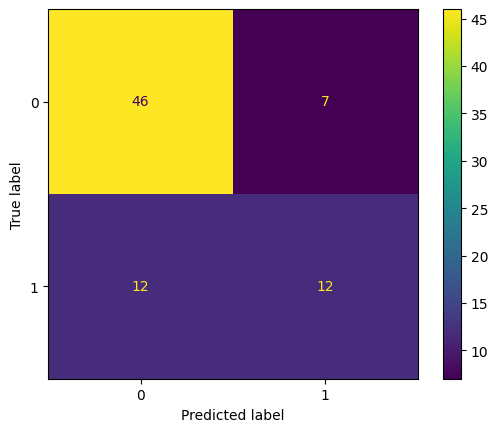

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, prediction3)
plt.show()

In [76]:
#Calculating the True Negative Rate
tnr = (confusion_matrix(y_test,prediction3)[0,0]/(confusion_matrix(y_test,prediction3)[0,0] + 
                                                confusion_matrix(y_test,prediction3)[0,1]) * 100).round()
#Calculating the False Positive Rate
fpr = (confusion_matrix(y_test,prediction3)[0,1]/(confusion_matrix(y_test,prediction3)[0,1] + 
                                                confusion_matrix(y_test,prediction3)[0,0]) * 100).round()
#Caculating the False Negative Rate
fnr = (confusion_matrix(y_test,prediction3)[1,0]/(confusion_matrix(y_test,prediction3)[1,0] + 
                                                confusion_matrix(y_test,prediction3)[1,1]) * 100).round()

In [77]:
print(f'True Negative Rate: {tnr}\nFalse Positive Rate: {fpr}\nFalse Negative Rate: {fnr}')

True Negative Rate: 87.0
False Positive Rate: 13.0
False Negative Rate: 50.0


#### By feeding more training data into the model, it had negative effect on the performance of the model. We see that both the False Positive Rate and False Negative Rate both increased and both the True Negative Rate and Recall have decreased. To conclude, it would appear that due to the dataset being small, with only 768 rows, the model does not have the sufficient amount of data to train on in order to improve its performance with a significant amount.